# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [ ]:
The task is understand what factors drive the price of a car. Based on the identified factors , consult the dealership on the type of 
cars to be stocked in the inventory the most.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [159]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import random

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')


In [160]:
df = pd.read_csv("vehicles.csv")

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [162]:
df.head(5)

id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2  NaN  NaN         NaN    fl  
3  NaN  NaN         NaN    ma  
4  NaN  NaN         NaN    nc

In [163]:
df.isnull().sum(axis=0)

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

Explore the unique values of certain columns like "drive", "type", "title_status", "condition"

In [164]:
columns_to_analyze = ['drive', 'type', 'title_status', 'condition','fuel','transmission','cylinders']

for column in columns_to_analyze:
    unique_values = df[column].unique()
    
    print(f"Categories in {column}: {unique_values}")

Categories in drive: [nan 'rwd' '4wd' 'fwd']
Categories in type: [nan 'pickup' 'truck' 'other' 'coupe' 'SUV' 'hatchback' 'mini-van' 'sedan'
 'offroad' 'bus' 'van' 'convertible' 'wagon']
Categories in title_status: [nan 'clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only']
Categories in condition: [nan 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']
Categories in fuel: [nan 'gas' 'other' 'diesel' 'hybrid' 'electric']
Categories in transmission: [nan 'other' 'automatic' 'manual']
Categories in cylinders: [nan '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders' 'other'
 '3 cylinders' '10 cylinders' '12 cylinders']


Exploratory data analysis

In [165]:
number_drive=df['drive'].value_counts().reset_index()
number_drive

index   drive
0   4wd  131904
1   fwd  105517
2   rwd   58892

In [166]:
number_cylinders=df['cylinders'].value_counts().reset_index()
number_cylinders

index  cylinders
0   6 cylinders      94169
1   4 cylinders      77642
2   8 cylinders      72062
3   5 cylinders       1712
4  10 cylinders       1455
5         other       1298
6   3 cylinders        655
7  12 cylinders        209

In [167]:
number_title_status=df['title_status'].value_counts().reset_index()
number_title_status

index  title_status
0       clean        405117
1     rebuilt          7219
2     salvage          3868
3        lien          1422
4     missing           814
5  parts only           198

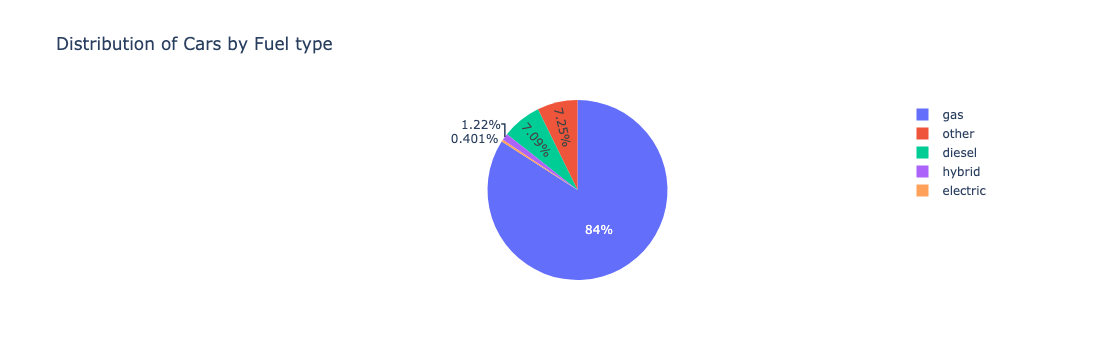

In [168]:
number_fuel=df['fuel'].value_counts().reset_index()
fig = px.pie(number_fuel, values='fuel', names='index',title='Distribution of Cars by Fuel type')
fig.show()

Get 10 priciest cars from the inventory 

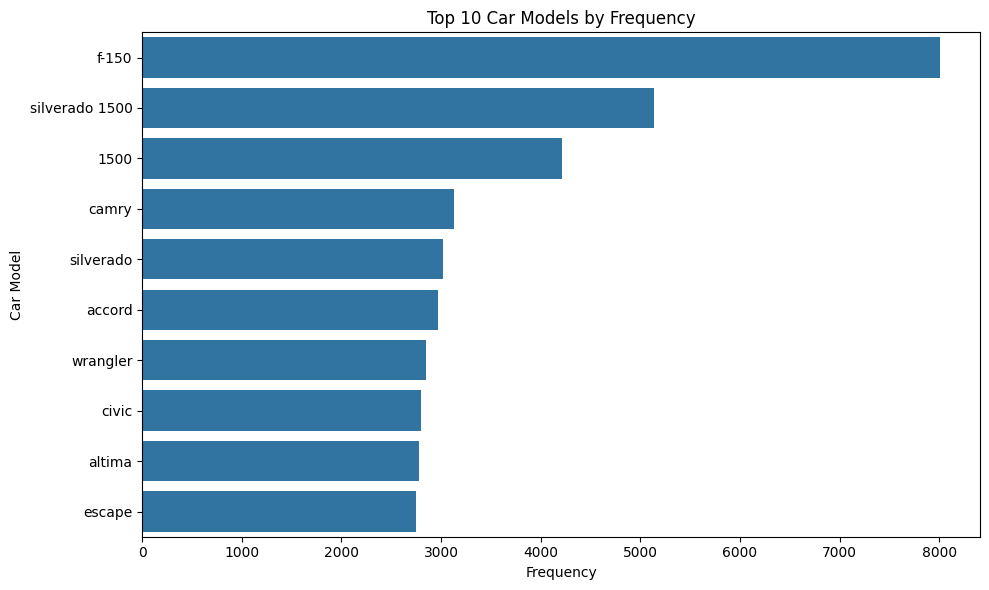

In [169]:

n = 10  # Number of top car models to plot
top_car_models = df['model'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()



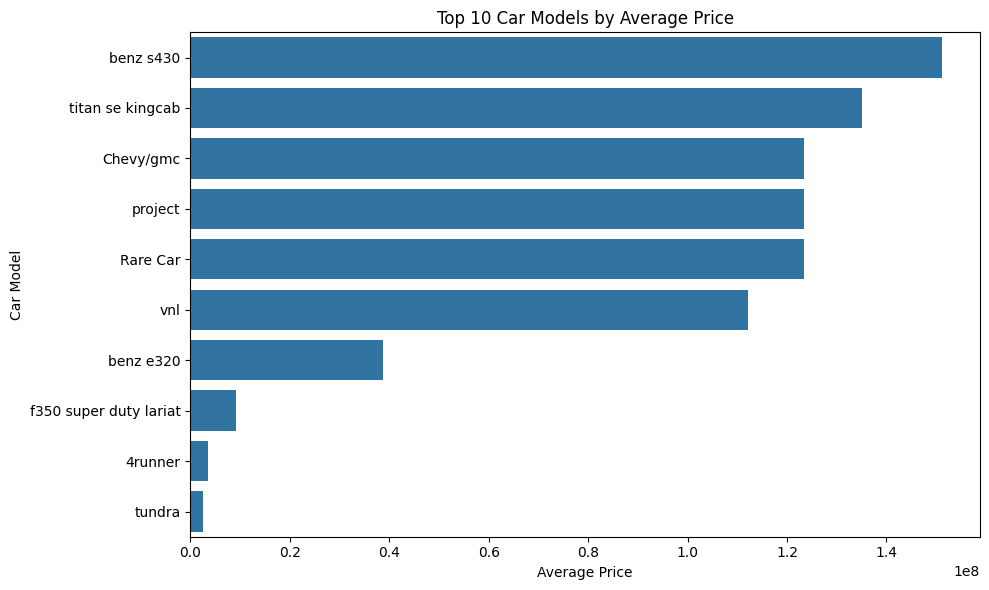

In [170]:
## Calculate average price for each car model

avg_prices_by_car = df.groupby('model')['price'].mean().sort_values(ascending=False)
n = 10  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()


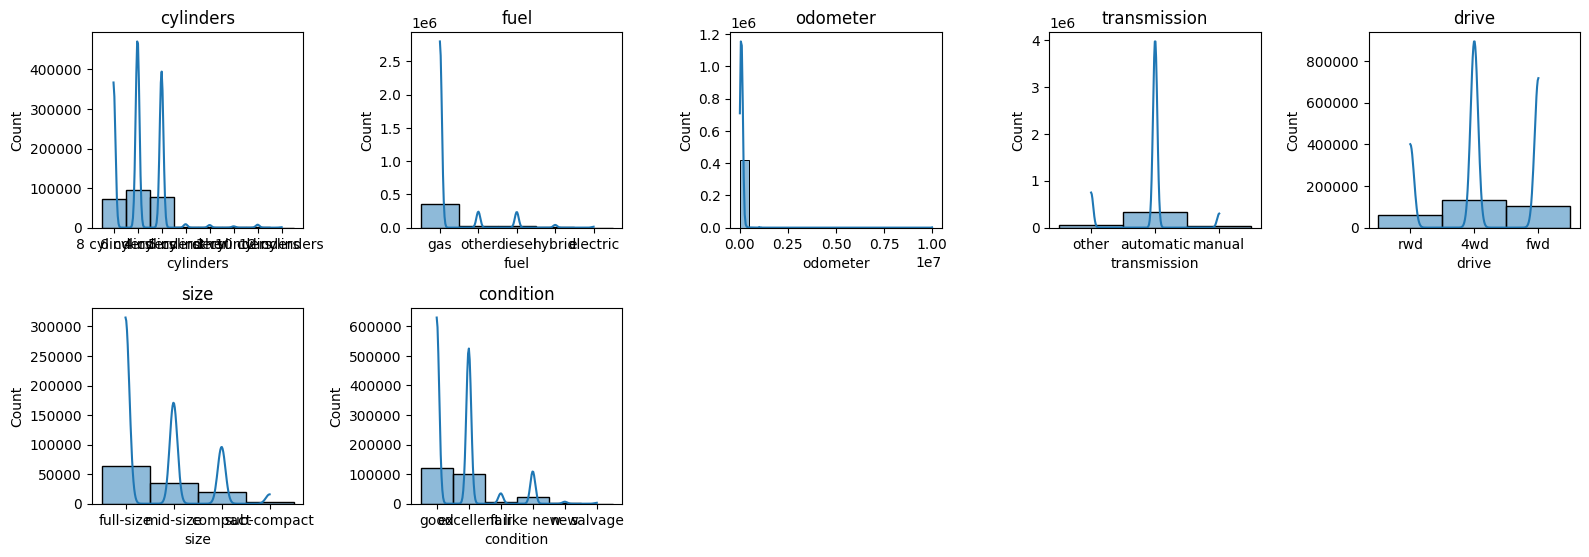

In [171]:
car_facets = [ 'cylinders', 'fuel', 'odometer','transmission', 'drive', 'size', 'condition']
plt.figure(figsize=(16,8))
for facet in car_facets:
    plt.subplot(3, 5, car_facets.index(facet) + 1)
    sns.histplot(data=df[facet], bins=20, kde=True)
    plt.title(facet)
plt.tight_layout()
plt.show()

Exploring for presence of any outliers

In [172]:
df.describe()[['price','odometer']]

price      odometer
count  4.268800e+05  4.224800e+05
mean   7.519903e+04  9.804333e+04
std    1.218228e+07  2.138815e+05
min    0.000000e+00  0.000000e+00
25%    5.900000e+03  3.770400e+04
50%    1.395000e+04  8.554800e+04
75%    2.648575e+04  1.335425e+05
max    3.736929e+09  1.000000e+07

The price column shown above has a min price $0 and outliers exists in the max range as well

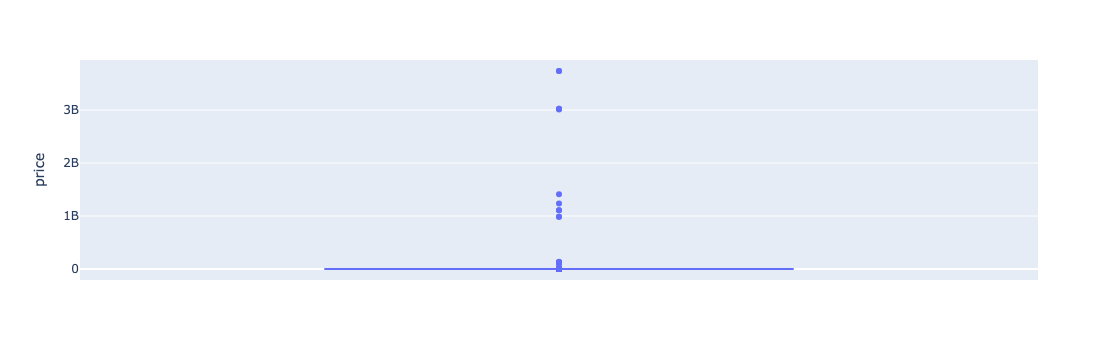

In [173]:
fig = px.box(df, y="price")
fig.show()

As we can see by hovering above the visualization above, there are a lot of outliers present in the 'price' column. The thick line at 0 is the box part of our box plot. 

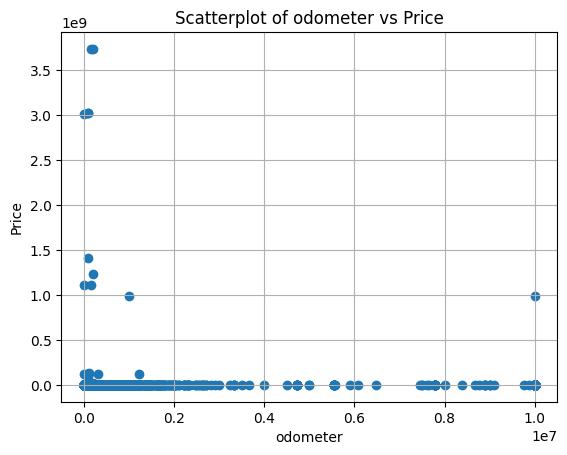

In [174]:
# Observing price based on odometer

plt.scatter(df['odometer'], df['price'])
plt.title('Scatterplot of odometer vs Price')
plt.xlabel('odometer')
plt.ylabel('Price')
plt.grid()
plt.show()

Based on the above distribution, a few outliers exists in the price column and odometer with cars in the inventory displaying zero price.

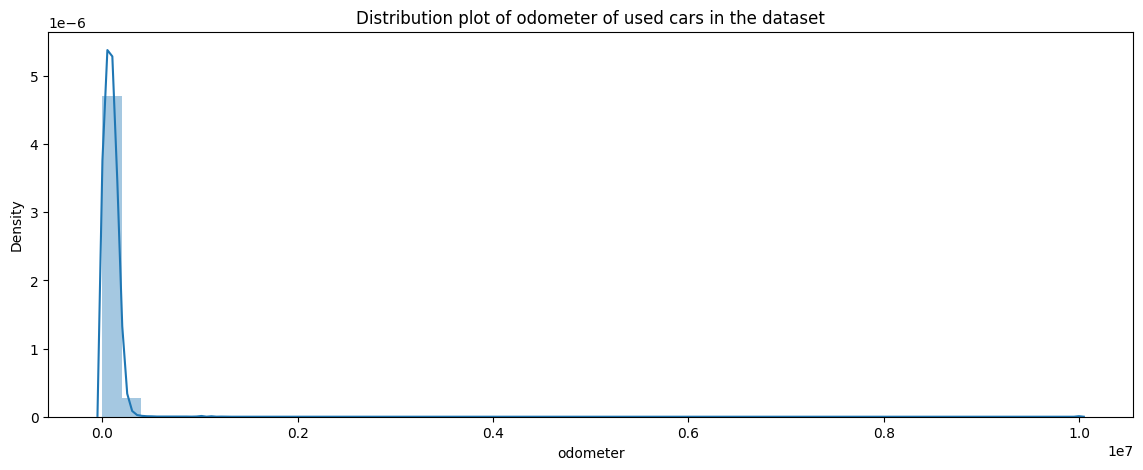

In [175]:
#Distribution plot of the odometer feature
plt.figure(figsize=(14,5))
sns.distplot(df['odometer']).set(title = 'Distribution plot of odometer of used cars in the dataset')
plt.show()

<Axes: xlabel='odometer', ylabel='price'>

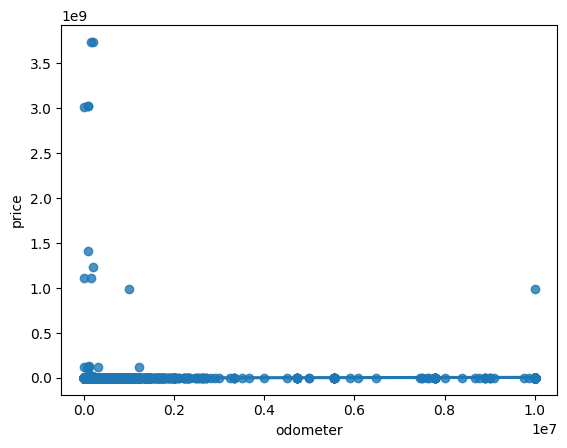

In [176]:
sns.regplot(x="odometer", y="price", data=df)

The above plot shows most car prices hovering less than 5000 as odometer increases. Cars with more mileage have a lesser cost price.

<Axes: xlabel='cylinders'>

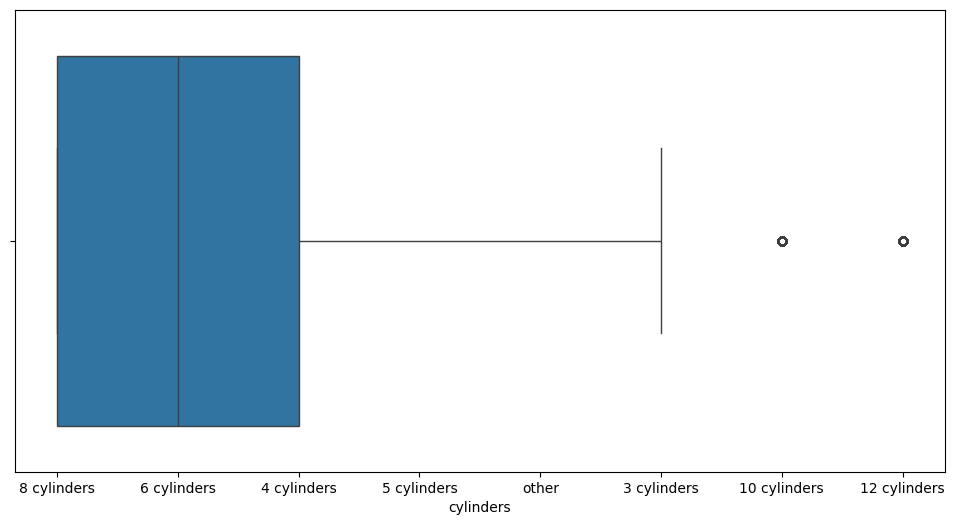

In [177]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x = "cylinders")

The above plot shows that most cars have between 4 - 8 cylinders

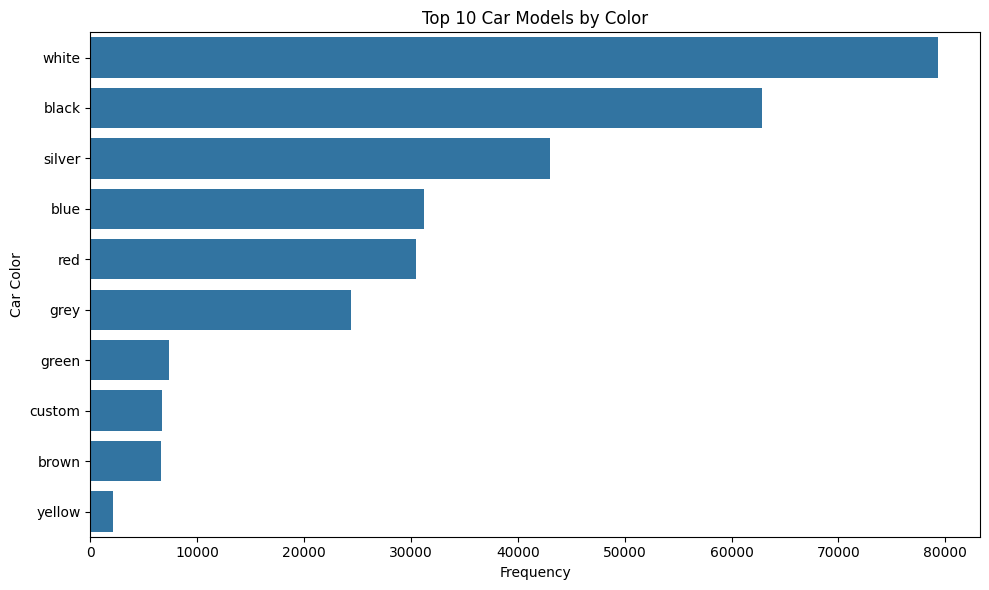

In [178]:
# Analyze top 10 cars by color

n = 10  # Number of most available cars by color
ext_color_counts = df['paint_color'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=ext_color_counts.values, y=ext_color_counts.index)
plt.title(f'Top {n} Car Models by Color')
plt.xlabel('Frequency')
plt.ylabel('Car Color')
plt.tight_layout()
plt.show()



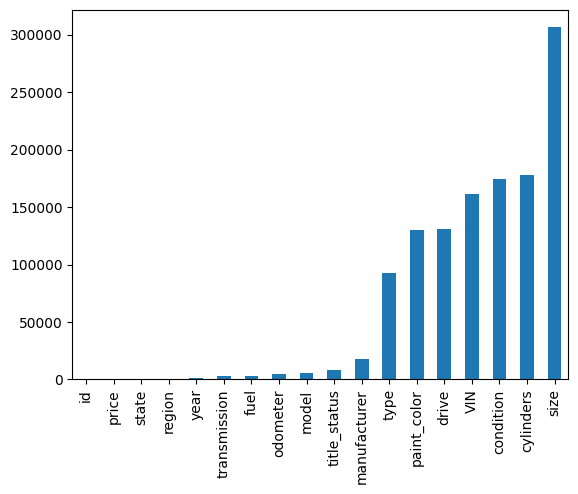

In [179]:
df.isnull().sum().sort_values().plot(kind='bar')
plt.show()

<Axes: >

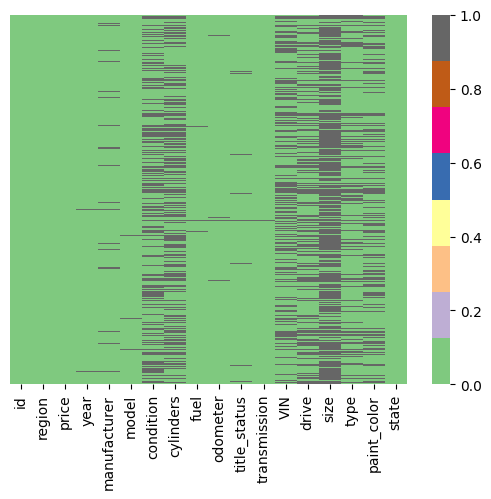

In [180]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='Accent')

In [181]:
df.isna().sum()/df.shape[0]*100

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64

In [182]:
df.duplicated().sum()

0

In [183]:
most_cars = df.groupby(by=['manufacturer'])['model'].count().sort_values(ascending=False)
most_cars = most_cars.reset_index()
price_most_cars= df[df['manufacturer'] == most_cars.iloc[0][0]]
price_most_cars = int(round(np.mean(price_most_cars['price']), 0))
most_cars.head(5)

manufacturer  model
0         ford  70269
1    chevrolet  54151
2       toyota  33944
3        honda  21155
4       nissan  18948

In [184]:
fuel_cars = df.groupby(by=['fuel'])['transmission'].count().sort_values(ascending=False)
fuel_cars = fuel_cars.reset_index()
price_most_cars= df[df['transmission'] == fuel_cars.iloc[0][0]]
fuel_cars.head(5)


fuel  transmission
0       gas        354674
1     other         30620
2    diesel         29894
3    hybrid          5151
4  electric          1679

Observations from Data exploration phase
1. Price column has outliers with prices ranging from $0 to $3024942282 (3 Million).
2. Some columns, like ‘year’, ‘mileage’, ‘odometer’ are float and  need to be converted to be  int.
3. Abnormalities such as missing values (NaNs) in several columns need to be fixed through data preprocessing.
4. From the above  visulizations one can infer existence of columns/data with large percentage of null/empty values,namely size (72%), cylinders (42%), condition (41%), VIN (38%), drive (31%), paint_color (31%) and type (22%).
5. No duplicate rows present in the dataset.
6. Inventory contains 83% of gas powered cars.
7. Ford car types are most popular.


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [185]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier threshold as 1.5 * IQR
lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR

# Filter out the rows with outliers in the 'price' column
df = df[(df['price'] >= lb) & (df['price'] <= ub)]

In [186]:
df_reduced = df.dropna()
df_reduced.shape

(34479, 18)

In [187]:
#Since size column is missing 70% of input, this will be dropped along with the other fields like id, VIN, region and state field
df_reduced = df_reduced.drop(columns=['manufacturer','model','size','id','VIN','region','state','condition','cylinders','drive','type','paint_color','title_status'], axis=1)
df_reduced.reset_index(inplace=True, drop = True)


In [188]:
df_reduced.isna().sum()/df_reduced.shape[0]*100

price           0.0
year            0.0
fuel            0.0
odometer        0.0
transmission    0.0
dtype: float64

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

<Axes: >

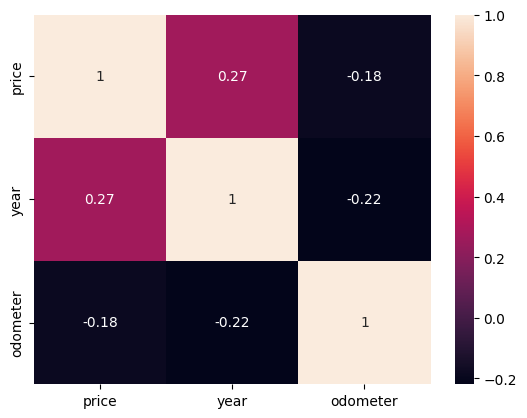

In [189]:
sns.heatmap(df_reduced[['price','year','odometer']].corr(), annot=True)


In [190]:
# Split the data into features (X) and target (y)
X = df_reduced.drop('price', axis=1) # Features
y = df_reduced['price'] # Target

In [191]:
#Check and handle categorical and numerical values
label_encoder = LabelEncoder()

x_cat = X.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_num = X.select_dtypes(exclude=['object']).values
x = pd.concat([pd.DataFrame(x_num), x_cat], axis=1).values


In [192]:
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [193]:
# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(n_estimators = 100, random_state = 42,oob_score=True)

# Fitting the Random Forest Regression model to the data
model.fit(x_train, y_train)

RandomForestRegressor(oob_score=True, random_state=42)

In [194]:
# Predicting the target values of the test set
y_pred = model.predict(x_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')



RMSE:  7254.006
R-squared: 0.641407916560327


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

<Unsure on how to proceed with the evaluation>

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

Old cars with low odometer values have a potential to be sold quickly. The dealership should stock up on these types of cars.

In [ ]:
Gathering more comprehensive and diverse data on used cars, including additional features such as maintenance history, location, and market demand, could enrich the model’s understanding of price determinants.

Gathering more comprehensive and diverse data on used cars, including additional features such as maintenance history, location, and market demand, could enrich the model’s understanding of price determinants.